In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import Libraries

## Library versions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# pip install geopy
from geopy.geocoders import Nominatim
from tqdm import tqdm


# Import Datasets & merge

In [32]:
path = 'processo_cientista-master/data/'

data = pd.read_csv(path+'rain_data_aus.csv')
winds = pd.DataFrame()

for number in [1,2,3,4,5,6,7,8]:
    df = pd.read_csv(path+f'wind_table_0{number}.csv')
    df.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    winds = pd.concat([winds,df])

data = pd.merge(data, winds, on=['date','location'])

# Exploring Data

## Analysis of *coluna_vigente*

Here we can analyse if the *coluna_vigente* would be the probability of raining in the next day.
In other words, woud be the prediction of the column *raintomorrow*

In [34]:
testi = data.loc[:,['raintomorrow','modelo_vigente']]

In [35]:
testi['prev'] = testi.modelo_vigente.apply(lambda x: x > 0.5)
testi['real'] = testi.raintomorrow.apply(lambda x: x == 'Yes')

In [36]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev)
print(CM)          

[[124404   2934]
 [ 10615  26433]]


In [37]:
from sklearn.metrics import classification_report

print(classification_report(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95    127338
        True       0.90      0.71      0.80     37048

    accuracy                           0.92    164386
   macro avg       0.91      0.85      0.87    164386
weighted avg       0.92      0.92      0.91    164386



In [38]:
tn, fp, fn, tp = confusion_matrix(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev).ravel()

precision = tp / (fp + tp)
recal = tp / (fn + tp)

print("precision :", precision)
print("recal :",round(recal,4))

precision : 0.9000919399325774
recal : 0.7135


In [39]:
prec = []
rec = []

for number in np.arange(0,1,0.05):

    testi['prev'] = testi.modelo_vigente.apply(lambda x: x > number)
    testi['real'] = testi.raintomorrow.apply(lambda x: x == 'Yes')


    tn, fp, fn, tp = confusion_matrix(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev).ravel()

    prec.append(tp / (fp + tp))
    rec.append(tp / (fn + tp))

In [40]:
# sns.scatterplot(x=np.arange(0,1,0.05), y=prec,label='precisão')
# sns.scatterplot(x=np.arange(0,1,0.05), y=rec,label='recal')


In [41]:
# sns.scatterplot(x=prec, y=rec,label='prec vs recall')

## dataframe: describe, info, columns... etc

In [42]:
print('porcentagem de dados nulos:\n')
print(round(data.isna().sum()/data.shape[0]*100))

porcentagem de dados nulos:

date                 0.0
location             0.0
mintemp              0.0
maxtemp              0.0
rainfall             1.0
evaporation         45.0
sunshine            51.0
humidity9am          1.0
humidity3pm          3.0
pressure9am         10.0
pressure3pm         10.0
cloud9am            39.0
cloud3pm            42.0
temp9am              1.0
temp3pm              2.0
raintoday            1.0
amountOfRain         0.0
raintomorrow         0.0
temp                 0.0
humidity             3.0
precipitation3pm     0.0
precipitation9am     0.0
modelo_vigente       0.0
wind_gustdir         6.0
wind_gustspeed       6.0
wind_dir9am          7.0
wind_dir3pm          3.0
wind_speed9am        1.0
wind_speed3pm        2.0
dtype: float64


In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,163614.0,12.166114,6.401191,-8.500000,7.600000,11.900000,16.800000,33.90000
maxtemp,163989.0,23.190111,7.120299,-4.800000,17.900000,22.600000,28.200000,48.10000
rainfall,162767.0,2.354322,8.417735,0.000000,0.000000,0.000000,0.800000,371.00000
evaporation,90128.0,5.494619,4.275539,0.000000,2.600000,4.800000,7.400000,145.00000
sunshine,80607.0,7.607071,3.778324,0.000000,4.900000,8.400000,10.600000,14.50000
humidity9am,162352.0,69.084495,18.993050,0.000000,57.000000,70.000000,83.000000,100.00000
humidity3pm,159262.0,51.669563,20.760959,0.000000,37.000000,52.000000,66.000000,100.00000
pressure9am,148085.0,1017.645456,7.129291,980.500000,1012.900000,1017.600000,1022.400000,1041.00000
pressure3pm,148113.0,1015.245303,7.056098,977.100000,1010.400000,1015.200000,1020.000000,1039.60000
cloud9am,100879.0,4.505328,2.893438,0.000000,1.000000,5.000000,7.000000,9.00000


In [44]:
data.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0


In [45]:
data.loc[(data.raintoday == 'No') & (data.precipitation9am > 1)].shape

(121687, 29)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 0 to 164385
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              164386 non-null  object 
 1   location          164386 non-null  object 
 2   mintemp           163614 non-null  float64
 3   maxtemp           163989 non-null  float64
 4   rainfall          162767 non-null  float64
 5   evaporation       90128 non-null   float64
 6   sunshine          80607 non-null   float64
 7   humidity9am       162352 non-null  float64
 8   humidity3pm       159262 non-null  float64
 9   pressure9am       148085 non-null  float64
 10  pressure3pm       148113 non-null  float64
 11  cloud9am          100879 non-null  float64
 12  cloud3pm          95716 non-null   float64
 13  temp9am           163410 non-null  float64
 14  temp3pm           160309 non-null  float64
 15  raintoday         162767 non-null  object 
 16  amountOfRain      16

## Rain data: analysis

In [ ]:
#data for analysis
prec = data.loc[:,['date', 'location', 'rainfall', 'precipitation3pm','precipitation9am']]
prec.loc[:,'date'] =  pd.to_datetime(prec.loc[:,'date'])
prec = prec.loc[prec.date <= '2016-06-24']

In [ ]:
prec['prec_last_24h'] = prec['precipitation3pm'] + prec['precipitation9am']

bob = prec.groupby(by=['location','date']).mean().reset_index()
bob['year'] = bob.daambda x: x.year)
bob['month'] = bob.date.apply(lambda x: x.month)
bob['quinzena'] = bob.date.apply(lambda x: 1 if x.day in list(np.arange(1,16)) else 2)

bob = bob.groupby(by=['year','month','quinzena','location']).sum().reset_index()

cities = {}

for city in tqdm(bob.location.unique()):
    df = bob.query(f'location == "{city}"').drop(columns = 'location').reset_index(drop=True)
    cities[city] = df

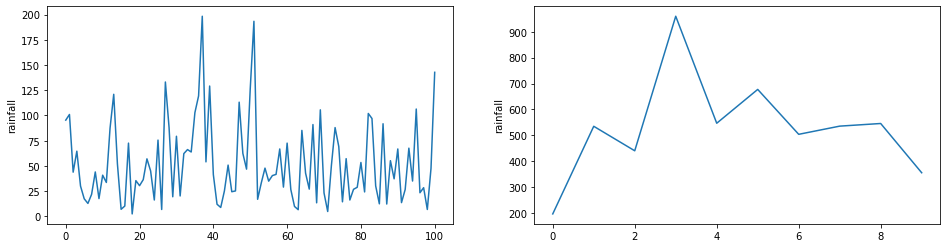

In [176]:
c = cities['Canberra']

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).sum().drop(columns='quinzena').reset_index()
c3 = c.groupby(by=['year']).sum().drop(columns=['quinzena','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

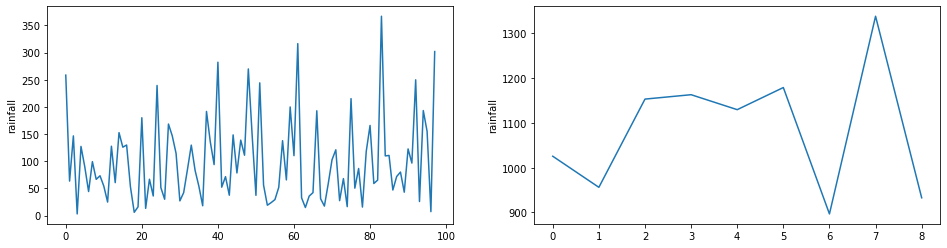

In [177]:
c = cities['Sydney']

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).sum().drop(columns='quinzena').reset_index()
c3 = c.groupby(by=['year']).sum().drop(columns=['quinzena','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

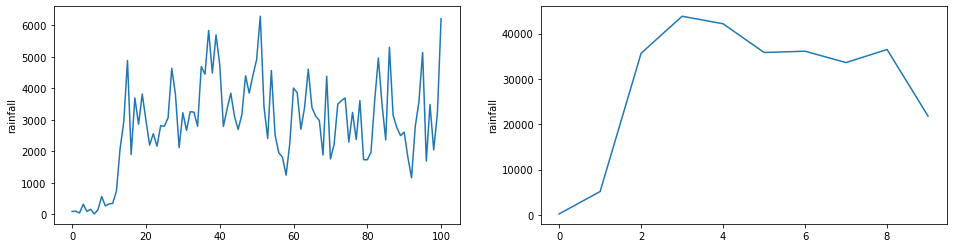

In [178]:
c = bob

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).sum().drop(columns='quinzena').reset_index()
c3 = c.groupby(by=['year']).sum().drop(columns=['quinzena','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

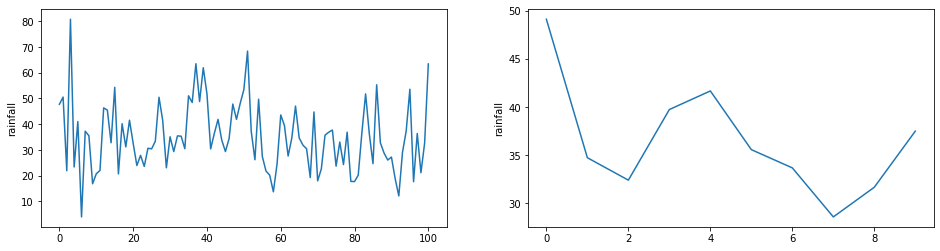

In [179]:
c = bob

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).mean().drop(columns='quinzena').reset_index()
c3 = c.groupby(by=['year']).mean().drop(columns=['quinzena','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

Maybe getting out some years will help!

## Relationship Analysis

### **relationship *raintoday* and *rainfall***

*raintoday* seems to be derived from *rainfall*

In [17]:
xmax = data.loc[data.raintoday == 'No'].rainfall.max()
xmin = data.loc[data.raintoday == 'No'].rainfall.min()
yesmin = data.loc[data.raintoday == 'Yes'].rainfall.min()

In [18]:
print(f'minimum rainfall for necessary for raintoday = False: {xmin}')
print(f'maximum rainfall for necessary for raintoday = False: {xmax}')
print(f'minimum rainfall for necessary for raintoday = True: {yesmin}')

minimum rainfall for necessary for raintoday = False: 0.0
maximum rainfall for necessary for raintoday = False: 1.0
minimum rainfall for necessary for raintoday = True: 1.1


### **relationship *raintomorrow* and *amountOfRain***

*raintomorrow* seems to be derived from *amountOfRain*

In [19]:
x_true_min = data.loc[(data.raintomorrow == 'No')].amountOfRain.min()
x_true_max = data.loc[(data.raintomorrow == 'No')].amountOfRain.max()
x_false_min = data.loc[(data.raintomorrow == 'Yes')].amountOfRain.min()

In [20]:
print(f'minimum rainfall for necessary for raintomorrow = False: {x_true_min}')
print(f'maximum rainfall for necessary for raintomorrow = False: {x_true_max}')
print(f'minimum rainfall for necessary for raintomorrow = True: {x_false_min}')

minimum rainfall for necessary for raintomorrow = False: 0.0
maximum rainfall for necessary for raintomorrow = False: 1.0
minimum rainfall for necessary for raintomorrow = True: 1.1


### relationship *rainfall* and *amountOfRain*

However, if we consider rainfall being on time 'T' and amountOfRain bein on time 'T+1', if we bring them to the same time window, we can see a really high High correlation between 

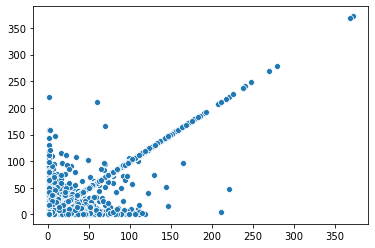

In [21]:
expectancy = np.array(data.amountOfRain[0:-1]) + 1
reality = np.array(data.rainfall[1:]) + 1

error = (expectancy - reality)/reality *100

sns.scatterplot(x=expectancy, y=reality)

### Discrepancy between rainfall/raintoday and raintomorrow/amountOfRain

Apart from the 1406 missing values of *rainfall*/*raintoday*, *raintomorrow*/*amountOfRain* should be
similar, since the seconds "would be" the first ones in a time t+1.

However, we have 13 rows with discrepant values between the two pairs!

In [22]:
pd.concat(  [data.rainfall[1:].reset_index(drop=True), 
             data.raintoday[1:].reset_index(drop=True),
             data.raintomorrow[0:-1].reset_index(drop=True),
             data.amountOfRain[0:-1].reset_index(drop=True)
            ],axis=1).dropna().query('raintoday != raintomorrow')

,rainfall,raintoday,raintomorrow,amountOfRain
2607,0.0,No,Yes,3.8
2609,3.8,Yes,No,0.0
2615,0.0,No,Yes,3.6
2617,3.6,Yes,No,0.0
2631,0.0,No,Yes,8.6
...,...,...,...,...
164114,2.8,Yes,No,0.2
164118,0.4,No,Yes,6.2
164120,6.2,Yes,No,0.2
164248,0.0,No,Yes,6.8


### temperature columns

In [23]:
# temperatura
# sns.pairplot(data.loc[:,['temp', 'mintemp', 'maxtemp', 'temp9am', 'temp3pm']])

### pressure columns

In [24]:
pressure = data.loc[:,['pressure9am', 'pressure3pm']]
# sns.pairplot(pressure)

### humidity columns

In [25]:
humidity = data.loc[:,['humidity9am', 'humidity3pm', 'humidity']]
# sns.pairplot(humidity)

In [26]:
print('porcentagem de dados nulos:\n')
print(round(winds.isna().sum()/data.shape[0]*100))

porcentagem de dados nulos:

date              0.0
location          0.0
wind_gustdir      6.0
wind_gustspeed    6.0
wind_dir9am       7.0
wind_dir3pm       3.0
wind_speed9am     1.0
wind_speed3pm     2.0
dtype: float64


# Treating Data

## ~Separating: data for training and data for testing~

We will separate data, for not overfitting. For this reason we will reserve the last 366 days for testing.

In [27]:
# total = data.shape[0]
# data_testing = data.loc[data.date > '2016-06-24']
# data = data.loc[data.date <= '2016-06-24']

# print('rows reserved for training: ', round(data.shape[0]/total*100,2),'%')
# print('rows reserved for testing:', round(data_testing.shape[0]/total*100,2),'%')

rows reserved for training:  78.61 %
rows reserved for testing: 21.39 %


## Treating dataset: data

**Treating: date column for datetime, raintoday and raintomorrow for binary categories**

In [47]:
# date string to date datetime:
data.loc[:,'date'] = pd.to_datetime(data.loc[:,'date'])

# yes = 1, no = 0
data.loc[:,'raintoday'] = data.loc[:,'raintoday'].apply(lambda x: 0 if x == 'No' else x)
data.loc[:,'raintoday'] = data.loc[:,'raintoday'].apply(lambda x: 1 if x == 'Yes' else x)
data.loc[:,'raintomorrow'] = data.loc[:,'raintomorrow'].apply(lambda x: 0 if x == 'No' else x)
data.loc[:,'raintomorrow'] = data.loc[:,'raintomorrow'].apply(lambda x: 1 if x == 'Yes' else x)

**Create a columns for month and create a column for season**

In [48]:
data['month'] = data.loc[:,'date'].apply(lambda x: x.month)

seasons = {12:'Summer', 1:'Summer', 2:'Summer', 
             3:'Autumn', 4:'Autumn', 5:'Autumn',
             6:'Winter', 7:'Winter', 8:'Winter',
             9:'Spring', 10:'Spring', 11:'Spring'}

data['season'] = data.loc[:,'month'].apply(lambda x: seasons[x])

**Formating location**

- some locations need to be formated and words separated (i.e. BadgerysCreek to Badgerys Creek)

In [49]:
data['location'] = data['location'].str.replace(r"([A-Z]+)", r" \1").str.strip()

**Filling NaNs with mean values per city** > Bad idea???

At a first try, we will desconsider those columns columns. 38%, 40% of missing is close to half of the dataset!

Columns with more than 10% NaN are:

- evaporation         42.789026
- sunshine            47.692924
- cloud9am            37.735332
- cloud3pm            40.152469

We will consider usem them later, maybe the missing is only a zero value!

In [50]:
data = data.drop(['evaporation', 'sunshine', 'cloud9am', 'cloud3pm'],axis=1)

**Dropping some other columns**

- ***modelo_vigente***: this column is the results of a prediction model, we won't need it for fitting the model, only for further comparations

In [51]:
data = data.drop('modelo_vigente',axis=1)

**Creating new variable: rainfall_index**

*rainfall_index* will be the mean amount of rainfall for that location

In [52]:
# rainfall_index = data.groupby(by='location').describe().loc[:,'rainfall'].loc[:,'mean']
# data['rainfall_index'] = data.loc[:,'location'].apply(lambda x: rainfall_index.loc[x])

**Dropping *temp***

*temp* is clearly dependend of the max temperature, and also has some missing values

In [53]:
data = data.drop('temp', axis=1)

**Adding a mean value for the proportion of raining the next day for each city**

- *raintomo_mean*: will be the respective prob of rain the next day for the current city. Its the sum of 'raintomorro' by the total of rows of the city.

In [54]:
#get a df of mean prob of raining the next day for each city
rainto_mean = data[['location', 'raintomorrow']].groupby(by='location').mean().reset_index()

my_dict = {}

for loc in rainto_mean.location.unique():
    my_dict[loc] = round(rainto_mean.query(f'location == "{loc}"').raintomorrow.values[0],4)
    
data['loc_rainto_mean'] = data.location.apply(lambda x: my_dict[x])

**Adding a mean value for the proportion of raining the next day for each *wind_direction***

- *raintomo_mean*: will be the respective prob of rain the next day for the current city. Its the sum of 'raintomorro' by the total of rows of the city.

In [55]:
#get a df of mean prob of raining the next day for each wind_direction
wind_rainto_mean = data[['wind_gustdir', 'raintomorrow']].groupby(by='wind_gustdir').mean().reset_index()

for loc in wind_rainto_mean.wind_gustdir.unique():
    my_dict[loc] = round(wind_rainto_mean.query(f'wind_gustdir == "{loc}"').raintomorrow.values[0],4)
    
data['wind_rainto_mean'] = data.wind_gustdir.apply(lambda x: my_dict[x] if type(x) == str else x)

**Adding coorinates (*lat*, *lon*) columns and dropping *location***

- We will add latitude and longitude as a mean for transforming the location in numeric values, instead of using them with get_dummies.
- We won't need location anymore so we will drop them

In [56]:
geolocator = Nominatim(user_agent="my-application")

unique_loc = data['location'].unique()

for city in tqdm(unique_loc):
    geoloc = geolocator.geocode(city,'Australia')
    my_dict[city + '_lat'] = geoloc.latitude
    my_dict[city + '_lon'] = geoloc.longitude
    
data['location_lat'] = data.location.apply(lambda x: my_dict[x + '_lat'] if type(x) == str else x)
data['location_lon'] = data.location.apply(lambda x: my_dict[x + '_lon'] if type(x) == str else x)

100%|██████████| 49/49 [00:41<00:00,  1.18it/s]


In [57]:
data = data.drop(columns='location')

**precipitacao nas ultimas 24h?**

supondo que a decisão é as 3 da tarde...

vai chover amanhã? à que horas do dia deve ser feito a previsão? 3 da tarde?

In [61]:
data['prec_last_24h'] = data['precipitation3pm'] + data['precipitation9am']
# NO FIM NÂO MUDOU SCORE, PRATICAMENTE O MESMO!

# Tobogã:

## importing libraries

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

## Preparing Data: X and y (train and test) and comparison with *modelo_vigente*

In [189]:
#teste dataframe, no cities and no season!
teste = data.drop(['rainfall','amountOfRain','month',
                   'precipitation3pm','precipitation9am'],axis=1).dropna()
teste = pd.get_dummies(teste)

In [190]:
# teste = teste.loc[teste.date > '2015-06-24']

In [191]:
#determine X and y
split_with_time = True

if split_with_time:
    before = teste.loc[teste.date <= '2016-06-24']
    after = teste.loc[teste.date > '2016-06-24']

    X_train =  before.drop(['raintomorrow','date'],axis=1)
    X_test = after.drop(['raintomorrow','date'],axis=1)

    y_train =  before.loc[:,'raintomorrow']
    y_test = after.loc[:,'raintomorrow']

else:
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    
#main data, in case tests are needed
X = teste.drop(['raintomorrow','date'],axis=1)
y = teste.loc[:,'raintomorrow']

#dummies
X = pd.get_dummies(X)

In [192]:
# Standardize data:
scaler = StandardScaler().fit(X_train)

X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

In [193]:
#import modelo_vigente
modelo_vigente = pd.read_csv(path+'rain_data_aus.csv').dropna().modelo_vigente


## MODELO_VIGENTE ROC CURVE
dframe = pd.read_csv(path+'rain_data_aus.csv')
mv_y_pred_prob = dframe.modelo_vigente
mv_y_test = dframe.raintomorrow.apply(lambda x: 1 if x == 'Yes' else 0)

## Taking the mean

In [194]:
the_mean = y_train.mean()
y_pred = y_train.apply(lambda x: the_mean).iloc[0:y_test.shape[0]]

accuracy_score(y_test, y_pred.apply(lambda x: 1 if x>0.5 else 0))

ValueError: Found input variables with inconsistent numbers of samples: [27594, 17240]

## Logistic regression

In [195]:
#instantiate the model and fit
logreg = LogisticRegression()

logreg.fit(X_train_std, y_train)

# let's evaluate - new data comes in:
predictions = logreg.predict(X_test_std)
pred_proba = logreg.predict_proba(X_test_std)

results = pd.DataFrame({'prob_not_rain': pred_proba[:,0], 
                          'prob_rain': pred_proba[:,1], 
                          'predictions':predictions,
                          'y_test':y_test})

accuracy_score(y_test, predictions)

0.8419946365151845

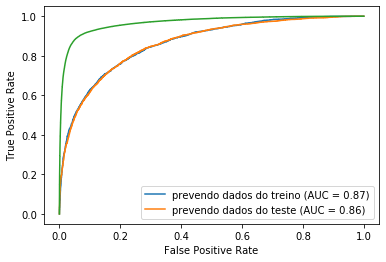

In [196]:
# results
fig, ax = plt.subplots()

plot_roc_curve(logreg, X_train_std, y_train, ax=ax, name = 'prevendo dados do treino')
plot_roc_curve(logreg, X_test_std, y_test, ax=ax, name = 'prevendo dados do teste')

fpr, tpr, thresholds = roc_curve(mv_y_test, mv_y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.show();

## Decision Trees

Remember: we don't need to standardize the data here!

100%|██████████| 9/9 [00:27<00:00,  3.04s/it]


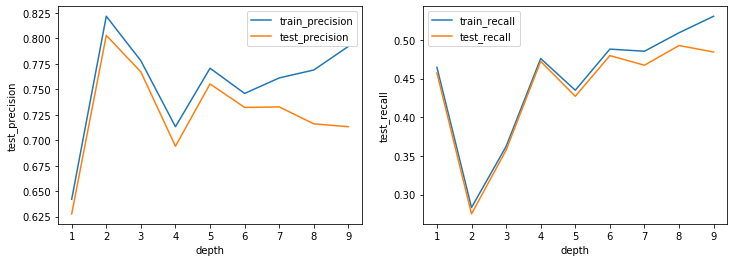

In [64]:
df = pd.DataFrame()

for N in tqdm(np.arange(1,10,1)):

    tree = DecisionTreeClassifier(max_depth=N)
    tree.fit(X_train, y_train)

    # TRAIN SET and get precision and recall
    tn, fp, fn, tp = confusion_matrix(y_train,tree.predict(X_train)).ravel()
    a1, a2 = tp / (fp + tp), tp / (fn + tp)

    # TEST SETand get precision, recall and test_score
    tn, fp, fn, tp = confusion_matrix(y_test,tree.predict(X_test)).ravel()
    a3, a4 = tp / (fp + tp), tp / (fn + tp)
    test_score = (tn + tp)/(tn + fp + fn + tp)


    minidf = pd.DataFrame({'depth':N, 'train_precision':a1, 
                          'train_recall':a2, 'test_precision':a3,
                          'test_recall':a4, 'test_score':test_score}, index=[0])
    df = pd.concat([df,minidf])
    
df = df.reset_index(drop=True)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

sns.lineplot(x='depth', y='train_precision', data=df, label = 'train_precision',ax=ax[0])
sns.lineplot(x='depth', y='train_recall', data=df, label = 'train_recall',ax=ax[1])
sns.lineplot(x='depth', y='test_precision', data=df, label = 'test_precision',ax=ax[0])
sns.lineplot(x='depth', y='test_recall', data=df, label = 'test_recall',ax=ax[1])

accuracy_score:  0.8343118069145466


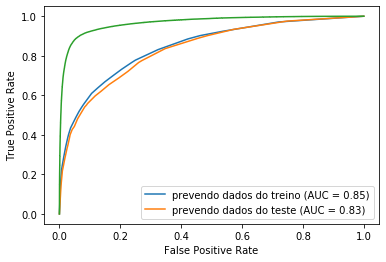

In [73]:
# fit with max_depth=7
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print('accuracy_score: ', acc_score)

# results
fig, ax = plt.subplots()

plot_roc_curve(tree, X_train, y_train, ax=ax, name = 'prevendo dados do treino')
plot_roc_curve(tree, X_test, y_test, ax=ax, name = 'prevendo dados do teste')

fpr, tpr, thresholds = roc_curve(mv_y_test, mv_y_pred_prob)
plt.plot(fpr, tpr, label='Decision Tree')
plt.show();

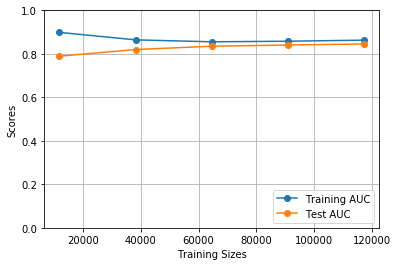

In [66]:
modelinho = DecisionTreeClassifier(max_depth=7)

curve = learning_curve(modelinho, X, y, cv=KFold(10), scoring='roc_auc')
# curve = learning_curve(modelinho, X, y, scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

## Manual log:
- mean() acc_score: 0.767051
- logreg acc_score: 0.844313
- logreg auc_test: 0.87
- tree acc_score: 0.83793578
- tree auc_test: 0.85